# Choate Seminar Example Code

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.signal
import wave
%matplotlib inline

## Sine Wave Examples

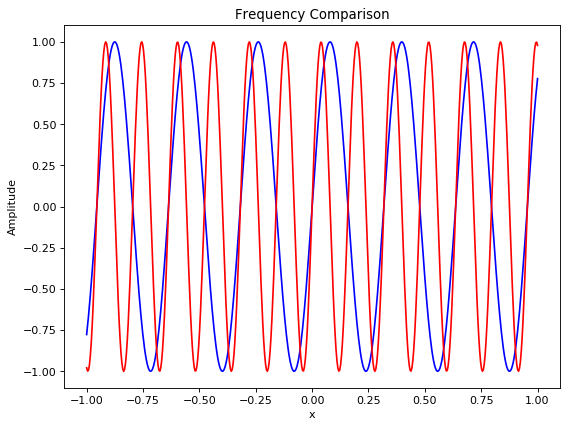

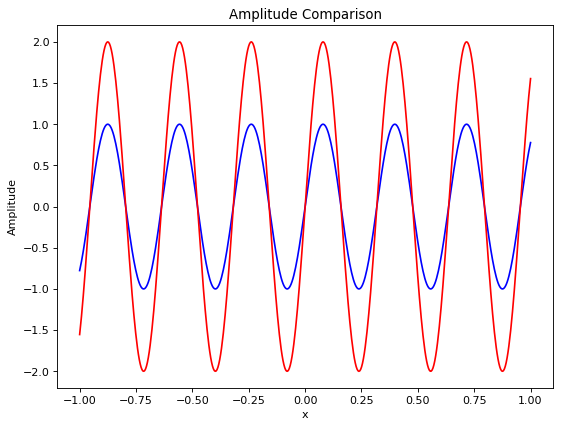

In [2]:
x = np.linspace(-np.pi,np.pi,500)
ex1 = np.sin(2*np.pi*x)
ex2 = np.sin(2*2*np.pi*x)
ex3 = 2 * np.sin(2*np.pi*x)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x/np.pi,ex1,'b-',x/np.pi,ex2,'r-')
plt.ylabel('Amplitude')
plt.xlabel('x')
plt.title('Frequency Comparison')
plt.show()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x/np.pi,ex1,'b-',x/np.pi,ex3,'r-')
plt.ylabel('Amplitude')
plt.xlabel('x')
plt.title('Amplitude Comparison')
plt.show()

## Fourier Transform Example

In [3]:
#FFT Example
Fs = 1000;            # Sampling frequency, 1000 samples per second
T = 1/Fs;             # Sampling period, length of time per sample
L = 1500;             # Length of signal
t = np.arange(0,L-1)*T;        # Time vector, make time steps at each frequency sampling time

Create a generic signal that is the sum of 2 sine waves with frequencies of 50 and 120 Hz and 0.7 and 1 for amplitudes respectively

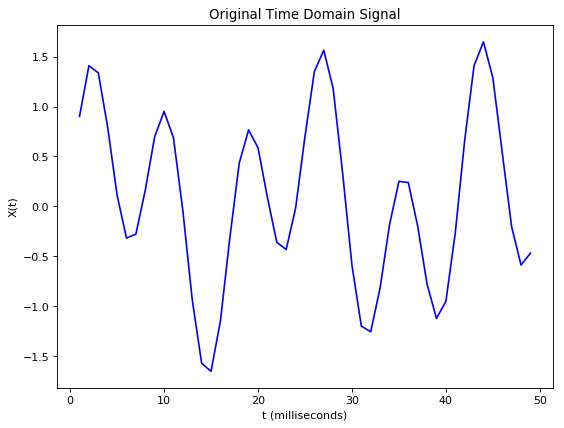

In [4]:
S = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t); 

#Plot uncorrupted signal in the time domain
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(1000*t[1:50],S[1:50],'b-')
plt.ylabel('X(t)')
plt.xlabel('t (milliseconds)')
plt.title('Original Time Domain Signal')
plt.show()

Take FFT of original signal
Compute the two-sided spectrum P2.

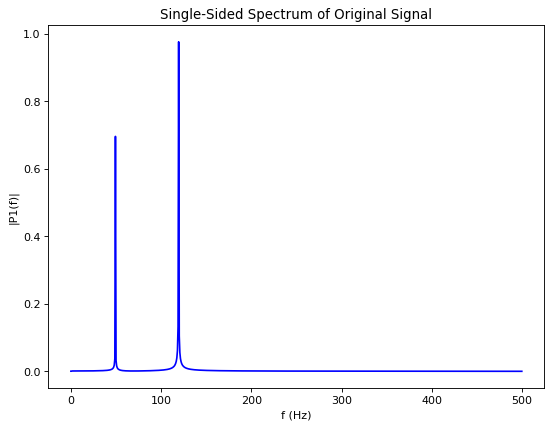

In [5]:
Y = scipy.fft(S)
P2 = abs(Y/L); #normalize by length of signal
P1 = P2[1:int(L/2+1)]; #convert to a single sided spectrum
# When converting to a single sided spectrum from a double sided spectrum we 
# must multiple by 2. 
#The easiest way to visualize this is to use the area under the curve.
# A two sided spectrum is symmetric about the y axis and the area under the
# curve is the power of the signal. To keep the same amount of power in a
# single sided spectrum as the double sided spectrum we must multiply it by
# 2.
P1[2:-2] = 2*P1[2:-2]; 

#Calculate frequency vector
# f * (fs/N)
f = np.fft.fftfreq(np.size(Y), 1/Fs)

#Plot FFT of original signal
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f[0:int(np.size(f)/2)+1],P1,'b-')
plt.ylabel('|P1(f)|')
plt.xlabel('f (Hz)')
plt.title('Single-Sided Spectrum of Original Signal')
plt.show()

Corrupt the signal with generic white noise

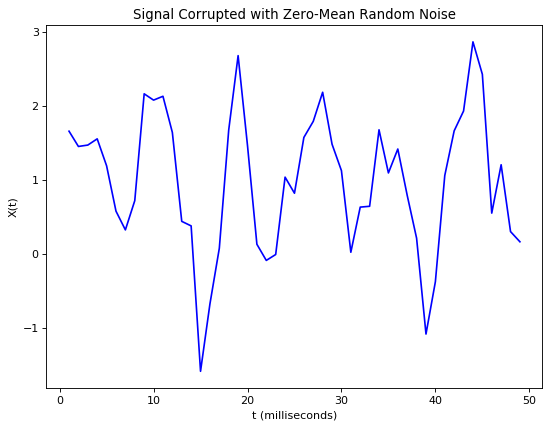

In [6]:
X = S + 2*np.random.rand(np.size(t));

#Plot the corrupted signal, we can't see the underlying frequencies anymore
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(1000*t[1:50],X[1:50],'b-')
plt.ylabel('X(t)')
plt.xlabel('t (milliseconds)')
plt.title('Signal Corrupted with Zero-Mean Random Noise')
plt.show()

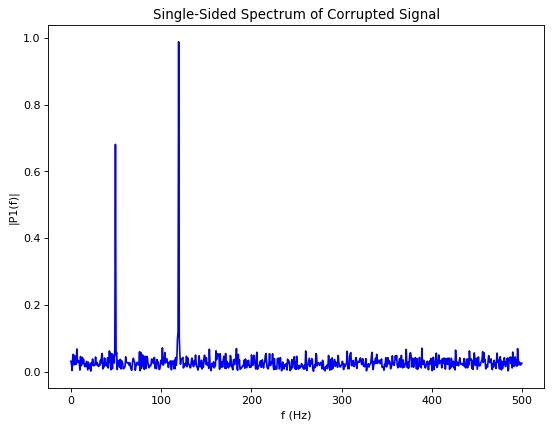

In [7]:
#Take FFT of corrupted signal
Y = scipy.fft(X);
P2 = abs(Y/L);
P1 = P2[1:int(L/2+1)];
P1[2:-2] = 2*P1[2:-2];

#Plot FFT of original signal
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f[0:int(np.size(f)/2+1)],P1,'b-')
plt.ylabel('|P1(f)|')
plt.xlabel('f (Hz)')
plt.title('Single-Sided Spectrum of Corrupted Signal')
plt.show()

## Discrete Fourier Transform

The example I just showed above, actually doesn't use the math I showed you earlier. The math I showed you was for a continous Fourier Transform. In reality, we calculate Discrete Fourier Transforms (DFTs). The main differences is a summation from n=0 to N-1 instead of an integral from -$\infty$ to $\infty$.

$$ x_k = \sum_{n=0}^{N-1} x_n e^{\frac{-i 2\pi k n}{N}}$$

Where,

1) $k$ is a frequency bin

2) $n$ is the sample you are looking at

3) $N$ is the total number of samples

## Filter Example

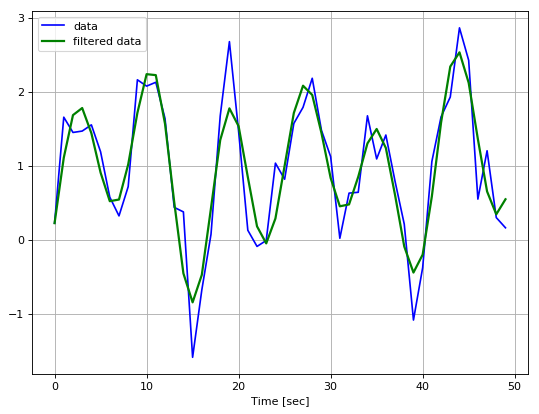

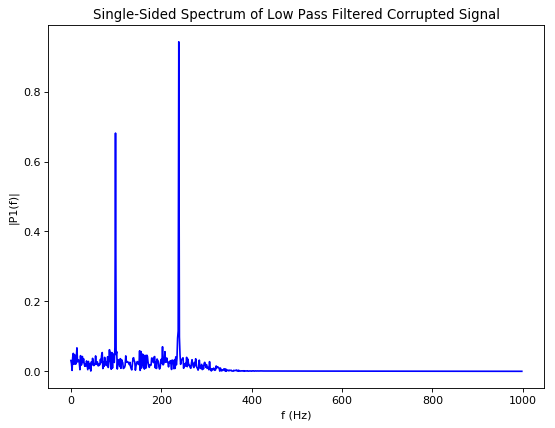

In [8]:
nyq = 0.5 * Fs
cutoff = 150
normal_cutoff = cutoff / nyq
b, a = scipy.signal.butter(6, normal_cutoff, btype='low', analog=False)
w, h = scipy.signal.freqz(b, a, worN=8000)

signal_filtered = scipy.signal.filtfilt(b,a,X)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(1000*t[0:50], X[0:50], 'b-', label='data')
plt.plot(1000*t[0:50], signal_filtered[0:50], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.show()
    
fft_filtered = np.fft.fft(signal_filtered)
P2_filtered = abs(fft_filtered/int(fft_filtered.size))
P1_filtered = P2_filtered[1:int(fft_filtered.size/2+1)]
P1_filtered[2:-2] = 2*P1_filtered[2:-2];
    
f_full_filtered = np.fft.fftfreq(int(fft_filtered.size), 1/Fs)
f_filtered = f_full_filtered[0:int(f_full_filtered.size/2)]

#Plot FFT of original signal
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(2*f_filtered[0:200000],P1_filtered[0:200000],'b-')
plt.ylabel('|P1(f)|')
plt.xlabel('f (Hz)')
plt.title('Single-Sided Spectrum of Low Pass Filtered Corrupted Signal')
plt.show()

# Fun with Wave Files

In [9]:
def butter_lowpass(cutoff, fs, signal, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    w, h = scipy.signal.freqz(b, a, worN=8000)
    Time=np.linspace(0, signal.size, signal.size) * (1/(2*fs))
    window = np.hanning(signal.size)
    
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Signal Wave...')
    plt.plot(Time,signal)
    plt.xlabel('Seconds');
    plt.ylabel('Amplitude');
    plt.show()
    
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0,500)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()
    plt.show()

    signal_filtered = scipy.signal.filtfilt(b,a,signal)

    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Time, signal, 'b-', label='Raw Data')
    plt.plot(Time, signal_filtered, 'g-', linewidth=2, label='Filtered Data')
    plt.xlabel('Time [sec]')
    plt.grid()
    plt.legend()
    plt.show()
    
    fft_orig = scipy.fft(signal*window)
    P2_orig = abs(fft_orig/int(fft_orig.size))
    P1_orig = P2_orig[1:int(fft_orig.size/2+1)]
    P1_orig[2:-2] = 2*P1_orig[2:-2];
    
    fft_filtered = scipy.fft(signal_filtered*window)
    P2_filtered = abs(fft_filtered/int(fft_filtered.size))
    P1_filtered = P2_filtered[1:int(fft_filtered.size/2+1)]
    P1_filtered[2:-2] = 2*P1_filtered[2:-2];
    
    f_full = np.fft.fftfreq(int(fft_filtered.size), 1/fs)
    f = f_full[0:int(f_full.size/2)]

    #Plot FFT of original signal
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(2*f[0:200000],P1_orig[0:200000],'b-', label='Raw Data')
    plt.plot(2*f[0:200000],P1_filtered[0:200000],'g-', label='Filtered Data')
    plt.ylabel('|P1(f)|')
    plt.xlabel('f (Hz)')
    plt.title('Single-Sided Spectrum of Low Pass Filtered Wave File')
    plt.show()

    return signal_filtered, f_full

def butter_highpass(cutoff, fs, signal, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    w, h = scipy.signal.freqz(b, a, worN=8000)
    Time=np.linspace(0, signal.size, signal.size) * (1/(2*fs))
    
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Signal Wave...')
    plt.plot(Time,signal)
    plt.xlabel('Seconds');
    plt.ylabel('Amplitude');
    plt.show()
    
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0,500)
    plt.title("Highpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()
    plt.show()

    signal_filtered = scipy.signal.filtfilt(b,a,signal)

    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Time, signal, 'b-', label='data')
    plt.plot(Time, signal_filtered, 'g-', linewidth=2, label='filtered data')
    plt.xlabel('Time [sec]')
    plt.grid()
    plt.legend()
    plt.show()
    
    fft_orig = scipy.fft(signal)
    P2_orig = abs(fft_orig/int(fft_orig.size))
    P1_orig = P2_orig[1:int(fft_orig.size/2+1)]
    P1_orig[2:-2] = 2*P1_orig[2:-2];
    
    fft_filtered = np.fft.fft(signal_filtered)
    P2_filtered = abs(fft_filtered/int(fft_filtered.size))
    P1_filtered = P2_filtered[1:int(fft_filtered.size/2+1)]
    P1_filtered[2:-2] = 2*P1_filtered[2:-2];
    
    f_full = np.fft.fftfreq(int(fft_filtered.size), 1/fs)
    f = f_full[0:int(f_full.size/2)]

    #Plot FFT of original signal
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(2*f[0:200000],P1_orig[0:200000],'b-', label='Raw Data')
    plt.plot(2*f[0:200000],P1_filtered[0:200000],'g-', label='Filtered Data')
    plt.ylabel('|P1(f)|')
    plt.xlabel('f (Hz)')
    plt.title('Single-Sided Spectrum of High Pass Filtered Wave File')
    plt.show()
    return signal_filtered, f_full

/home/cj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


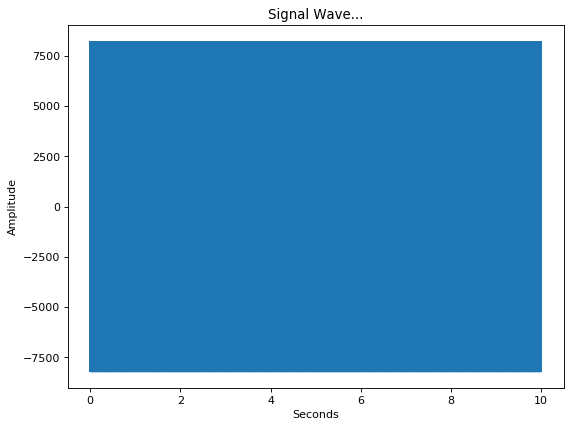

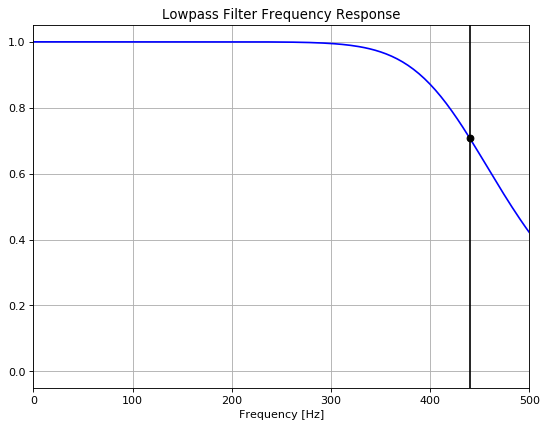

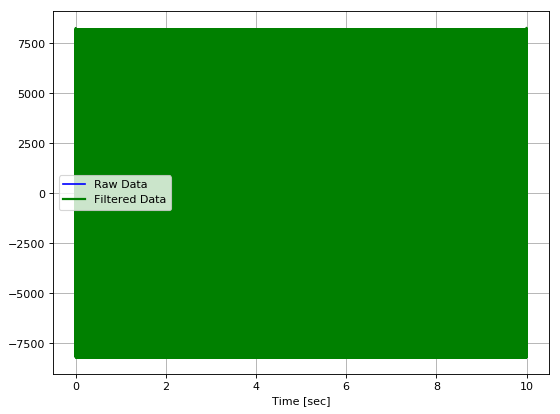

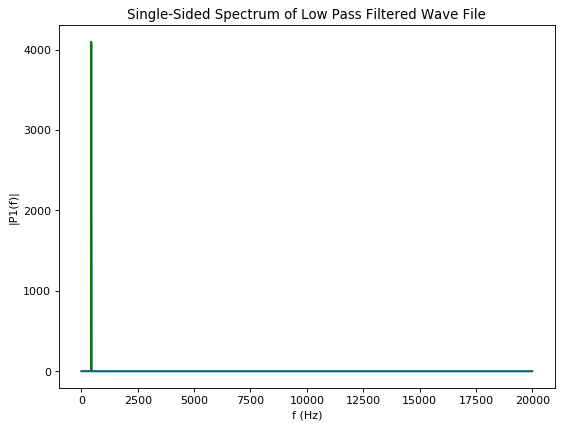

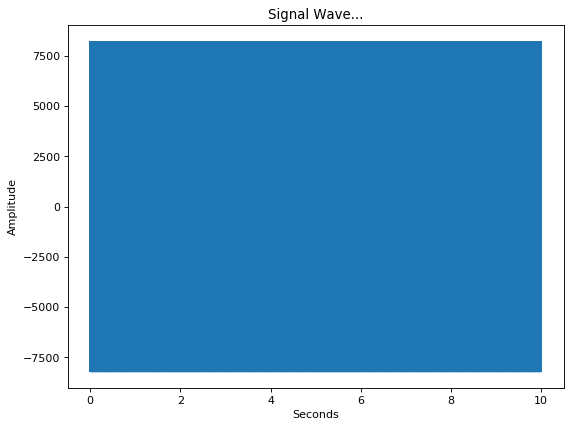

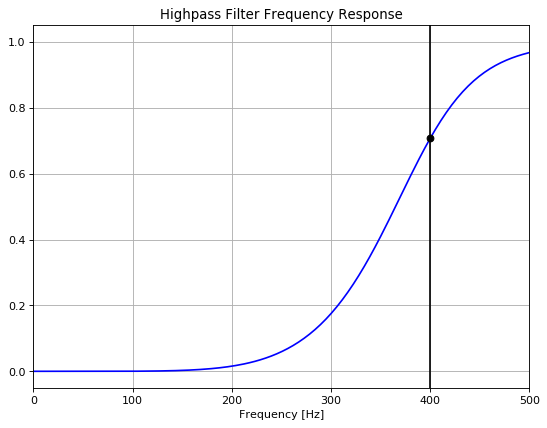

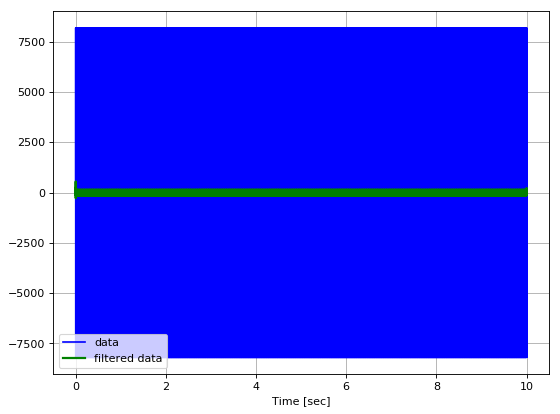

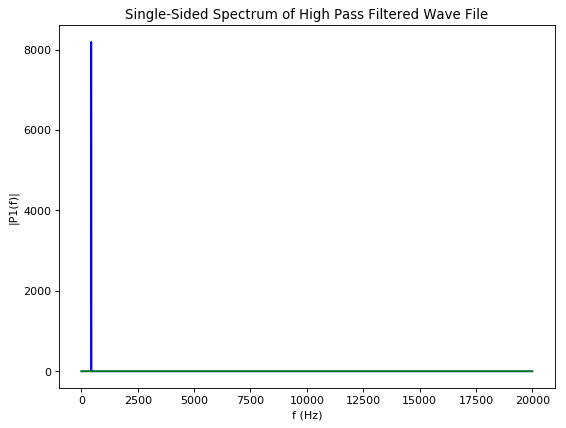

In [10]:
#import our wave file
wave_file = wave.open('/home/cj/Downloads/440.wav','r')

#Extract Raw Audio from Wav File
temp = wave_file.readframes(-1)

#Convert raw integer audio to an array we can plot using numpy and trim it to a managable size
temp = np.fromstring(temp, 'Int16')
signal = temp[0:int(temp.size)]

#Get frame rate to plot against time
fs = wave_file.getframerate()

#Low Pass Filter
cutoff_LP = 440
signal_LP, f_full_LP, = butter_lowpass(cutoff_LP, fs, signal)

#High Pass Filter
cutoff_HP = 400
signal_HP, f_full_HP, = butter_highpass(cutoff_HP, fs, signal)

/home/cj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


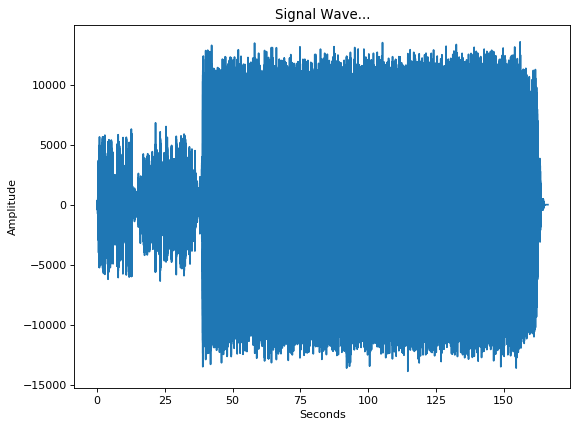

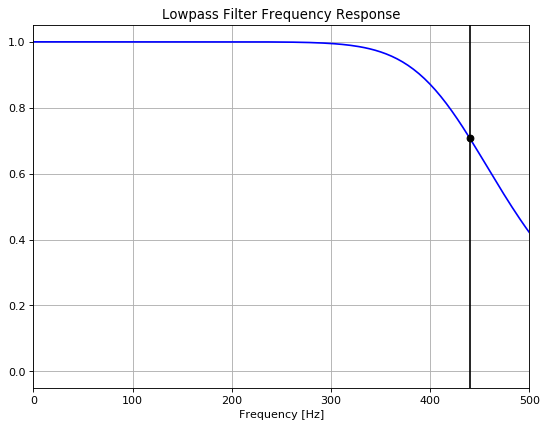

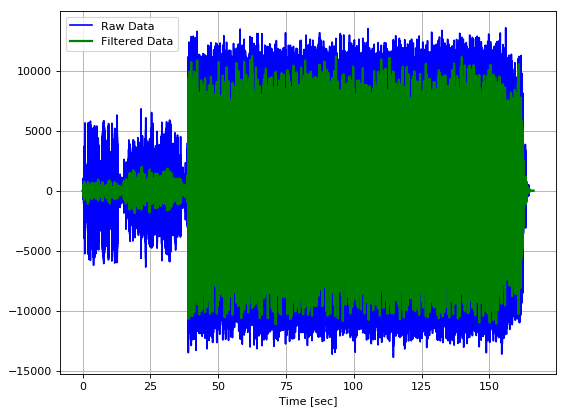

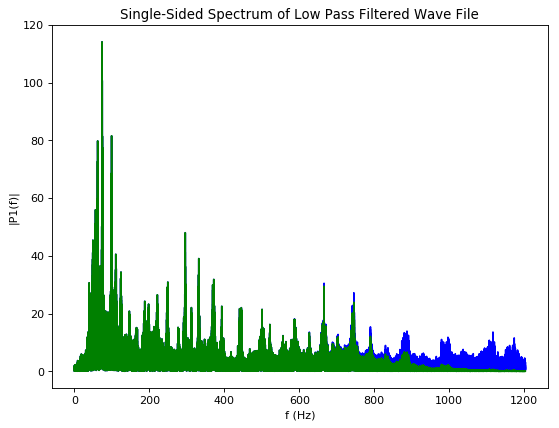

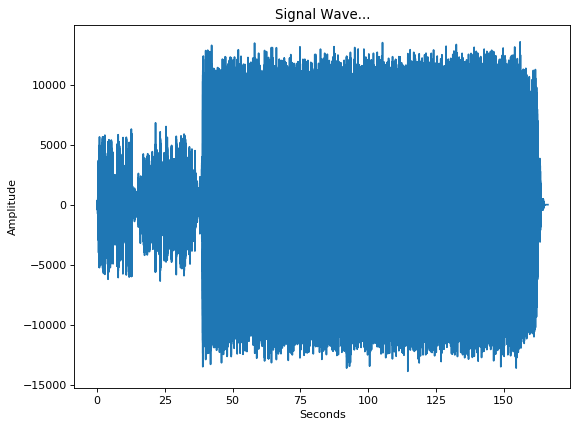

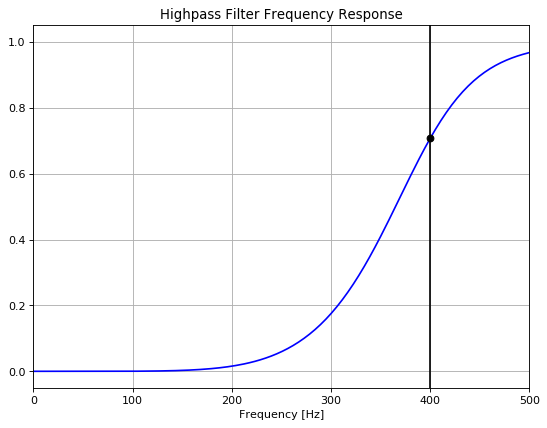

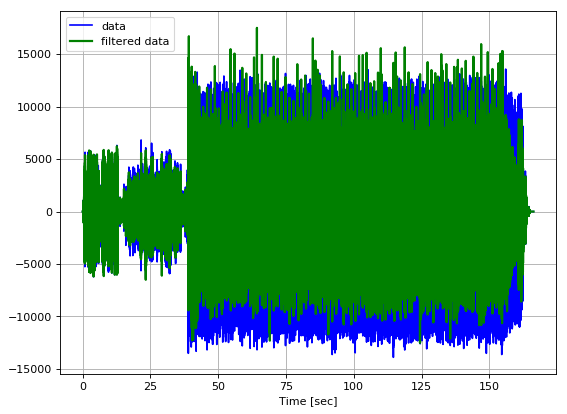

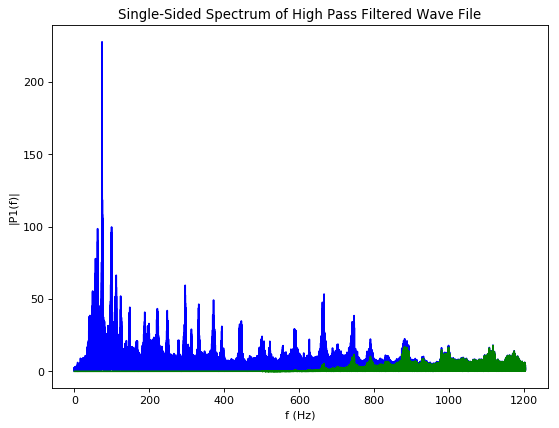

In [11]:
#import our wave file
wave_file = wave.open('/home/cj/Downloads/The-Killers-Show-You-How.wav','r')

#Extract Raw Audio from Wav File
temp = wave_file.readframes(-1)

#Convert raw integer audio to an array we can plot using numpy and trim it to a managable size
temp = np.fromstring(temp, 'Int16')
signal = temp[0:int(temp.size)]

#Get frame rate to plot against time
fs = wave_file.getframerate()

#Low Pass Filter
cutoff_LP = 440
signal_LP, f_full_LP, = butter_lowpass(cutoff_LP, fs, signal)
signal_LP2 = np.asarray(signal_LP, dtype=np.int16) #convert array of floats to 16 bit integers
import scipy.io.wavfile
scipy.io.wavfile.write('/home/cj/Desktop/LowPass.wav', 2*fs, signal_LP2)

#High Pass Filter
cutoff_HP = 400
signal_HP, f_full_HP, = butter_highpass(cutoff_HP, fs, signal)
signal_HP2 = np.asarray(signal_HP, dtype=np.int16)
import scipy.io.wavfile
scipy.io.wavfile.write('/home/cj/Desktop/HighPass.wav', 2*fs, signal_HP2)